
# 🧭 Lecture 5: Knowledge Graphs and Data Integration Methods
**Duration:** 2 hours  
**Dataset:** Titanic dataset + mock crew dataset  

### 🎯 Learning Objectives
- Understand what data integration is and why it matters.  
- Learn practical techniques to join, merge, and reconcile datasets.  
- Get introduced to entity resolution and knowledge graphs.  
- Practice integration using Python, Pandas, and OpenRefine.
    


## 🧠 1. Introduction to Data Integration

Data Integration = combining data from multiple sources into a **unified view**.

### Examples:
- Google Maps (traffic + user data + GPS)
- Uber (drivers + passengers + location)
- Facebook (users + ads + businesses)
- Siri (voice + search + maps)

**Why Important?**  
Businesses derive value by combining multiple data sources.
    


## 🧪 2. Hands-On Lab 1 — Merging Titanic & Crew Data with Pandas
We'll simulate integrating passenger and crew data from two datasets.
    

In [1]:

import pandas as pd

# Load Titanic dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:

# Mock crew dataset
crew_data = {
    'Name': ['Smith, Mr. James', 'Brown, Mr. Edward', 'Allen, Miss. Lily', 'Andrews, Mr. Thomas', 'Bonnell, Miss. Elizabeth'],
    'Role': ['Cook', 'Engineer', 'Nurse', 'Deck Officer', 'Doctor'],
    'Experience_Years': [5, 8, 4, 10, 7]
}

crew = pd.DataFrame(crew_data)
crew


,Name,Role,Experience_Years
0,"Smith, Mr. James",Cook,5
1,"Brown, Mr. Edward",Engineer,8
2,"Allen, Miss. Lily",Nurse,4
3,"Andrews, Mr. Thomas",Deck Officer,10
4,"Bonnell, Miss. Elizabeth",Doctor,7


In [3]:

# Merge both datasets (simulate integration)
merged = pd.merge(titanic, crew, on='Name', how='outer', indicator=True)
merged[['Name','Survived','Role','Experience_Years','_merge']].head(10)


,Name,Survived,Role,Experience_Years,_merge
0,"Abbing, Mr. Anthony",0.0,NaN,NaN,left_only
1,"Abbott, Mr. Rossmore Edward",0.0,NaN,NaN,left_only
2,"Abbott, Mrs. Stanton (Rosa Hunt)",1.0,NaN,NaN,left_only
3,"Abelson, Mr. Samuel",0.0,NaN,NaN,left_only
4,"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0,NaN,NaN,left_only
5,"Adahl, Mr. Mauritz Nils Martin",0.0,NaN,NaN,left_only
6,"Adams, Mr. John",0.0,NaN,NaN,left_only
7,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0.0,NaN,NaN,left_only
8,"Aks, Mrs. Sam (Leah Rosen)",1.0,NaN,NaN,left_only
9,"Albimona, Mr. Nassef Cassem",1.0,NaN,NaN,left_only



### 🧩 Try changing the join type:
```python
pd.merge(titanic, crew, on='Name', how='inner')
pd.merge(titanic, crew, on='Name', how='left')
pd.merge(titanic, crew, on='Name', how='outer')
```
Discuss how results differ!

Exploring Join Types in Pandas

Only one name (“Bonnell, Miss. Elizabeth”) matched exactly between both datasets, so this is the intersection (data present in both tables).

In [5]:
# INNER JOIN → Keeps only matching records (intersection)
inner_join = pd.merge(titanic, crew, on='Name', how='inner')
inner_join[['Name', 'Survived', 'Role', 'Experience_Years']].head()


,Name,Survived,Role,Experience_Years
0,"Bonnell, Miss. Elizabeth",1,Doctor,7


- All Titanic passengers appear (even if they’re not in the crew list).

- NaN values indicate that those records don’t have corresponding crew data.

In [6]:
# LEFT JOIN → Keeps all Titanic records; adds matching crew info where available
left_join = pd.merge(titanic, crew, on='Name', how='left')
left_join[['Name', 'Survived', 'Role', 'Experience_Years']].head(10)


,Name,Survived,Role,Experience_Years
0,"Braund, Mr. Owen Harris",0,NaN,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,NaN,NaN
2,"Heikkinen, Miss. Laina",1,NaN,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,NaN,NaN
4,"Allen, Mr. William Henry",0,NaN,NaN
5,"Moran, Mr. James",0,NaN,NaN
6,"McCarthy, Mr. Timothy J",0,NaN,NaN
7,"Palsson, Master. Gosta Leonard",0,NaN,NaN
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,NaN,NaN
9,"Nasser, Mrs. Nicholas (Adele Achem)",1,NaN,NaN


The outer join keeps everything — all passengers and all crew.

The _merge column shows the origin:

- left_only: from Titanic only

- right_only: from Crew only

- both: matched in both

In [7]:
# OUTER JOIN → Keeps all records from both tables (union)
outer_join = pd.merge(titanic, crew, on='Name', how='outer', indicator=True)
outer_join[['Name', 'Survived', 'Role', 'Experience_Years', '_merge']].tail(10)


,Name,Survived,Role,Experience_Years,_merge
885,"Yrois, Miss. Henriette (""Mrs Harbeck"")",0.0,NaN,NaN,left_only
886,"Zabour, Miss. Hileni",0.0,NaN,NaN,left_only
887,"Zabour, Miss. Thamine",0.0,NaN,NaN,left_only
888,"Zimmerman, Mr. Leo",0.0,NaN,NaN,left_only
889,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",1.0,NaN,NaN,left_only
890,"de Mulder, Mr. Theodore",1.0,NaN,NaN,left_only
891,"de Pelsmaeker, Mr. Alfons",0.0,NaN,NaN,left_only
892,"del Carlo, Mr. Sebastiano",0.0,NaN,NaN,left_only
893,"van Billiard, Mr. Austin Blyler",0.0,NaN,NaN,left_only
894,"van Melkebeke, Mr. Philemon",0.0,NaN,NaN,left_only


Optional Visual Summary(visually showing join types in Venn form)

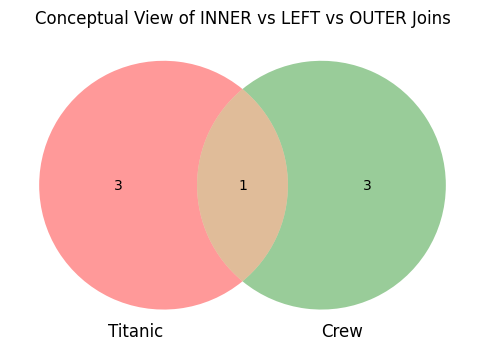

In [8]:
import matplotlib_venn as mv
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
mv.venn2(subsets=(3, 3, 1), set_labels=('Titanic', 'Crew'))
plt.title("Conceptual View of INNER vs LEFT vs OUTER Joins")
plt.show()



## 🌐 3. Knowledge Graphs and Semantic Integration
A **Knowledge Graph (KG)** represents information as **entities and their relationships**.

Examples:
- Google Knowledge Graph
- Freebase (acquired by Google in 2010)
- Wikidata
    

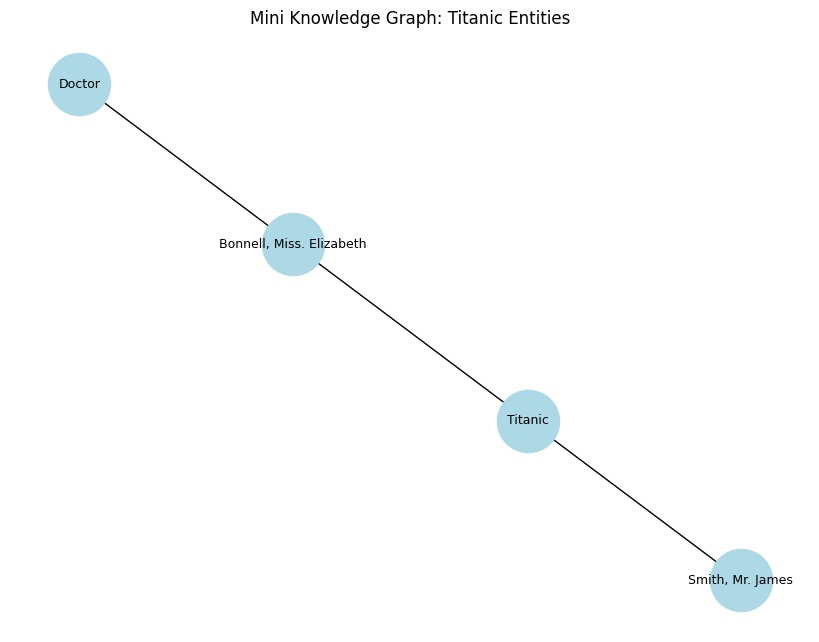

In [9]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes and relationships
G.add_node("Titanic", type="Ship")
G.add_edge("Titanic", "Smith, Mr. James", relation="Crew")
G.add_edge("Titanic", "Bonnell, Miss. Elizabeth", relation="Passenger")
G.add_edge("Bonnell, Miss. Elizabeth", "Doctor", relation="AssistedBy")

# Visualize
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=9)
plt.title("Mini Knowledge Graph: Titanic Entities")
plt.show()



## 🔍 4. Entity Resolution & Fuzzy Matching
When unique IDs are missing, we can still match similar records using **fuzzy string matching**.

We'll simulate name variations and match them.
    

In [10]:

!pip install fuzzywuzzy[speedup] python-Levenshtein --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.5 MB/s eta 0:00:00


In [11]:

from fuzzywuzzy import fuzz, process

names = ["Smith, Mr. James", "Smyth, Mr. James", "Brown, Mr. Edward", "Brown, Mrs. Edwrd", "Bonnell, Miss. Elizabeth"]

for name in names:
    match = process.extractOne(name, names, scorer=fuzz.token_sort_ratio)
    print(f"{name} → Best Match: {match}")


Smith, Mr. James → Best Match: ('Smith, Mr. James', 100)
Smyth, Mr. James → Best Match: ('Smyth, Mr. James', 100)
Brown, Mr. Edward → Best Match: ('Brown, Mr. Edward', 100)
Brown, Mrs. Edwrd → Best Match: ('Brown, Mrs. Edwrd', 100)
Bonnell, Miss. Elizabeth → Best Match: ('Bonnell, Miss. Elizabeth', 100)



### 💡 Discussion
- Adjust threshold (e.g., >85%) to define duplicates.  
- Think about: How would LinkedIn or Amazon use this?  
- Try cleaning duplicates in **OpenRefine** (optional demo).
    


## 🧩 5. Quick Quiz (From NVIDIA DLI)

1️⃣ Social networks like Facebook integrate user, business, and advertiser data.
> ✅ **Answer:** True  

2️⃣ SQL Join can be considered a form of data integration.  
> ✅ **Answer:** True  

3️⃣ Data integration is one way businesses derive value from multiple sources.  
> ✅ **Answer:** True  
    


## 🧠 6. Summary
- **Data Integration**: combining multiple datasets for unified analysis.  
- **Knowledge Graphs**: represent entities and relationships.  
- **Entity Resolution**: deduplicate when IDs are missing.  
- **Core Tools**: Pandas, SQL, FuzzyWuzzy, OpenRefine.

📘 **Next:** Tomorrow we’ll explore **Descriptive vs Predictive Analytics** using Titanic survival patterns.
    